In [1]:
import numpy as np
import pandas as pd
from astropy import table
from pathlib import Path
import os
import matplotlib.pyplot as plt
from scipy import interpolate
import treecorr as tc
from astropy.io.misc.hdf5 import read_table_hdf5
from astropy import units as u
from astropy.cosmology import Planck18 as cosmo
from astropy.coordinates import SkyCoord


In [2]:
LOP_NORTH_AREA = 4400
LOP_SOUTH_DECAL_AREA = 8500
LOP_SOUTH_DES_AREA = 1100
TOTAL_DESI_AREA = 14000
AREA_PER_HEALPIX = 57.071968/17 
AREA_TWO_HEALPIX = 2*AREA_PER_HEALPIX

In [3]:
# load in the desi ELG distributions 
path_desi_data = '/Users/yokisalcedo/Desktop/desi_selector/data/desi_data/desi_elg_ts_zenodo/main-800coaddefftime1200-nz-zenodo.ecsv'
desi_data = table.Table.read(path_desi_data, format='ascii.ecsv')
desi_data.colnames
zmin = desi_data['ZMIN']
zmax = desi_data['ZMAX']

lop_north = desi_data['ELG_LOP_NORTH']
lop_south_decal = desi_data['ELG_LOP_SOUTH_DECALS']
lop_south_des = desi_data['ELG_LOP_SOUTH_DES']
vlo_north = desi_data['ELG_VLO_NORTH']
vlo_south_decal = desi_data['ELG_VLO_SOUTH_DECALS']
vlo_south_des = desi_data['ELG_VLO_SOUTH_DES']

lop_desi = desi_data['ELG_LOP_DESI']
vlo_desi = desi_data['ELG_VLO_DESI']
weightedavg = (lop_north * LOP_NORTH_AREA + lop_south_decal * LOP_SOUTH_DECAL_AREA  + lop_south_des * LOP_SOUTH_DES_AREA  )/(TOTAL_DESI_AREA)


In [5]:
hpix_ids = [9030, 9031]
path_mock_hpix_9030 = f'/Users/yokisalcedo/Desktop/desi_selector/data/mock_elgs/mock_elgs_per_pix/mock_elg_cat_hpix_{hpix_ids[0]}.parquet'
mock_elg_cat_9030 = pd.read_parquet(path=path_mock_hpix_9030)
path_mock_hpix_9031 = f'/Users/yokisalcedo/Desktop/desi_selector/data/mock_elgs/mock_elgs_per_pix/mock_elg_cat_hpix_{hpix_ids[1]}.parquet'
mock_elg_cat_9031 = pd.read_parquet(path=path_mock_hpix_9031)
mock_elg_cat = pd.concat([mock_elg_cat_9030, mock_elg_cat_9031])

path_rand_hpix_9030 = f'/Users/yokisalcedo/Desktop/desi_selector/data/mock_elgs/mock_elgs_rands_per_pix/rand_elg_cat_hpix_{hpix_ids[0]}.parquet'
rand_elg_cat_9030 = pd.read_parquet(path=path_rand_hpix_9030)
path_rand_hpix_9031 = f'/Users/yokisalcedo/Desktop/desi_selector/data/mock_elgs/mock_elgs_rands_per_pix/rand_elg_cat_hpix_{hpix_ids[1]}.parquet'
rand_elg_cat_9031 = pd.read_parquet(path=path_rand_hpix_9031)
rand_elg_cat = pd.concat([rand_elg_cat_9030, rand_elg_cat_9031])

In [6]:
len(mock_elg_cat)

6178

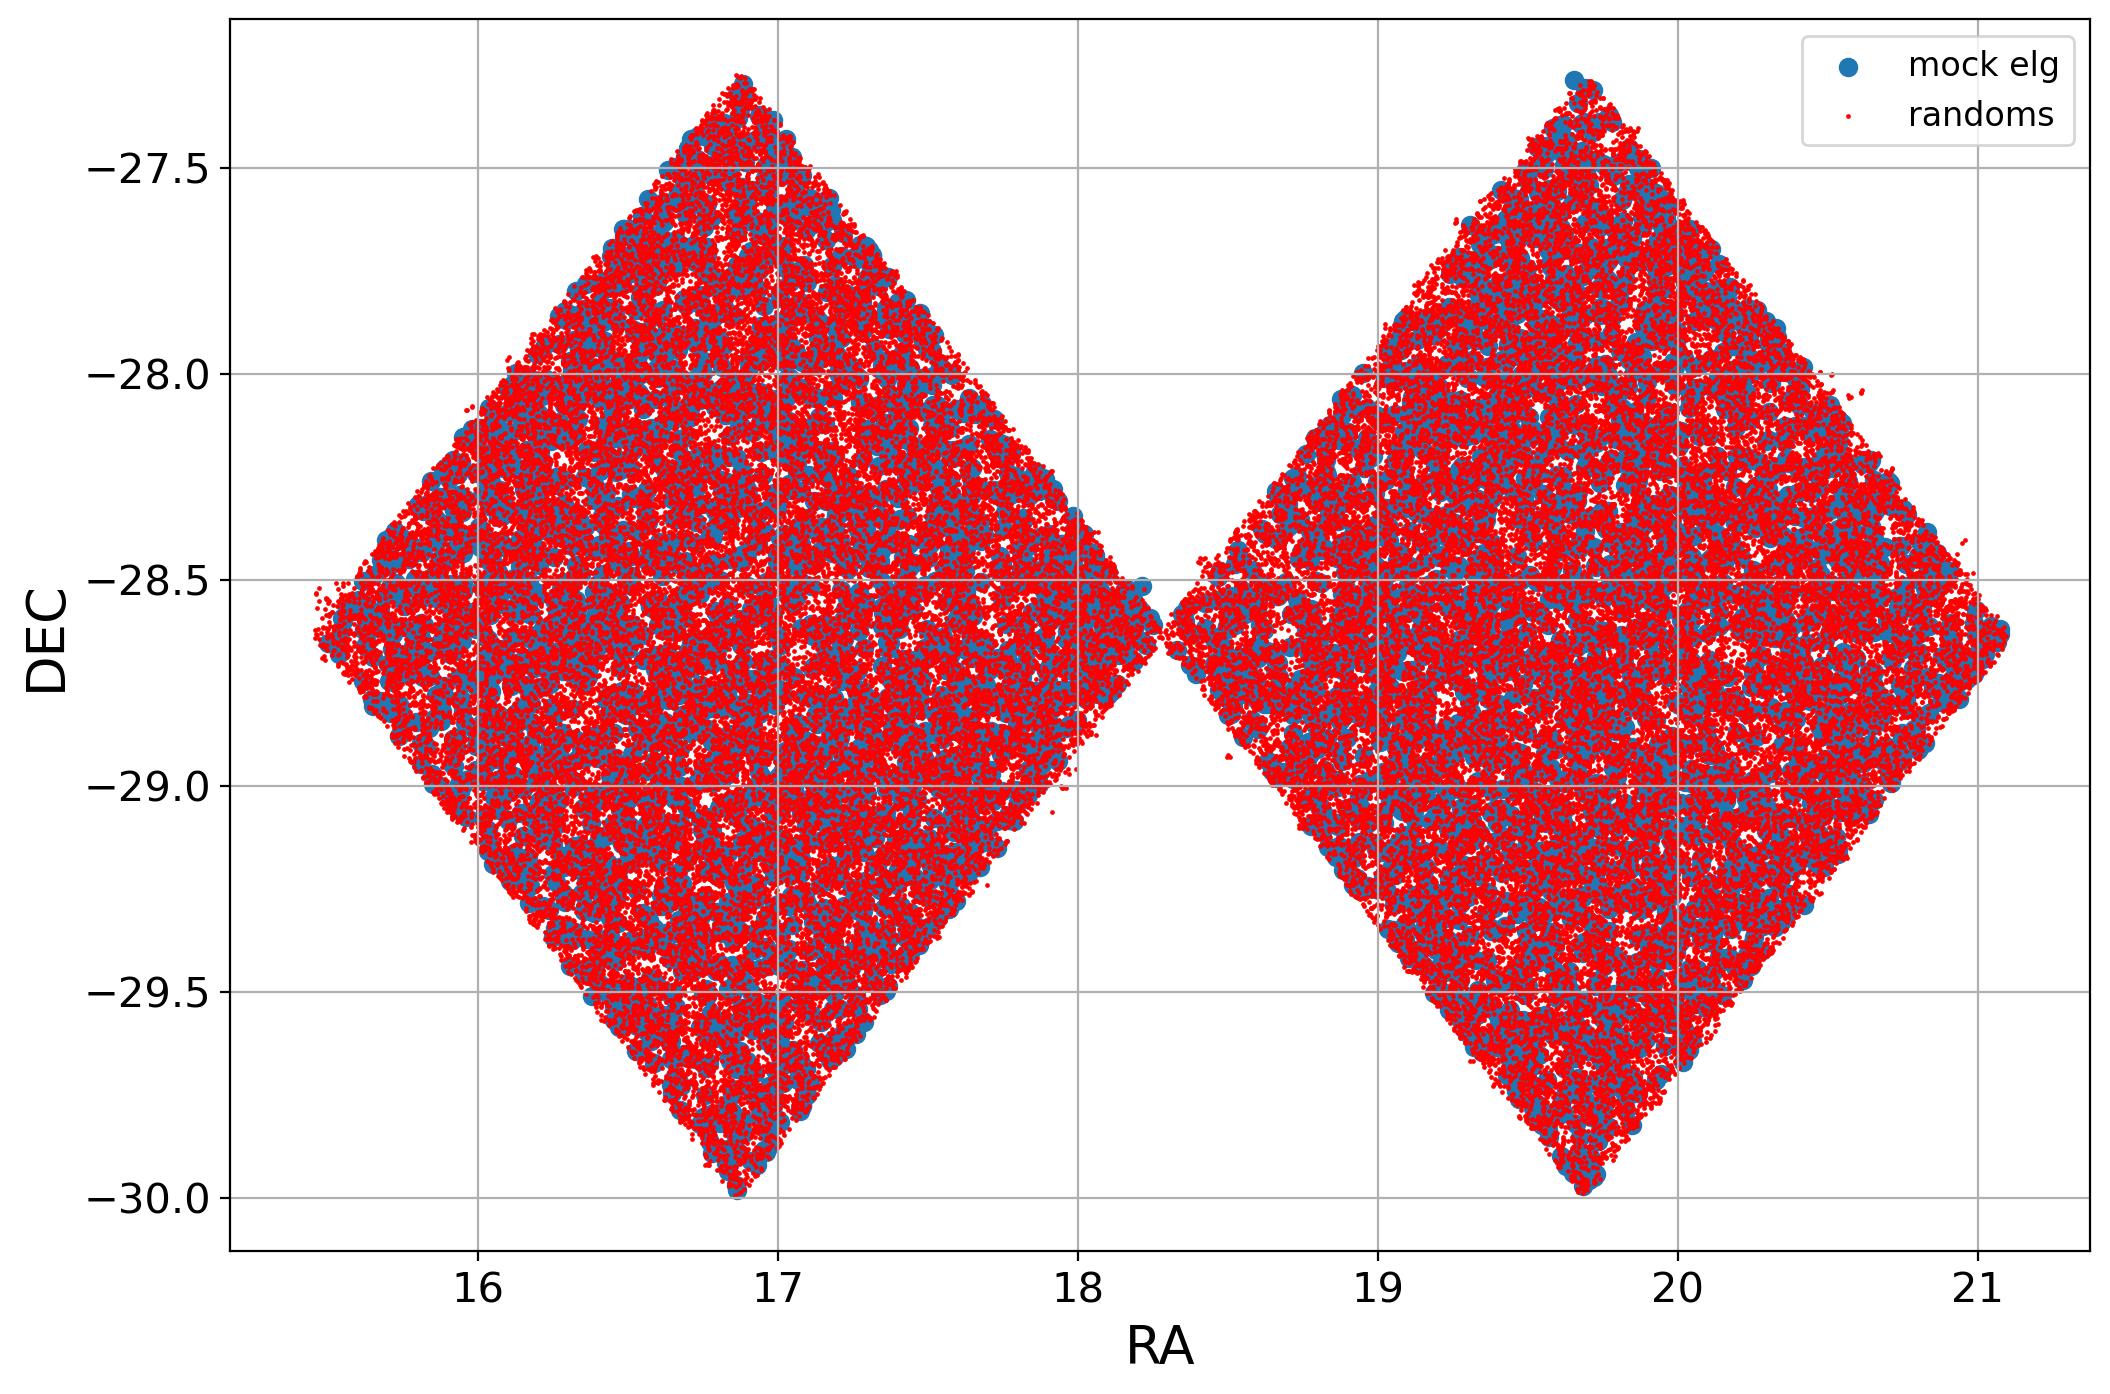

In [7]:
plt.scatter(mock_elg_cat['ra'], mock_elg_cat['dec'], label='mock elg')
plt.scatter(rand_elg_cat['ra'], rand_elg_cat['dec'], label='randoms', s=0.5, color='red')
plt.ylabel('DEC', fontsize=19 )
plt.xlabel('RA', fontsize=19)
plt.legend()

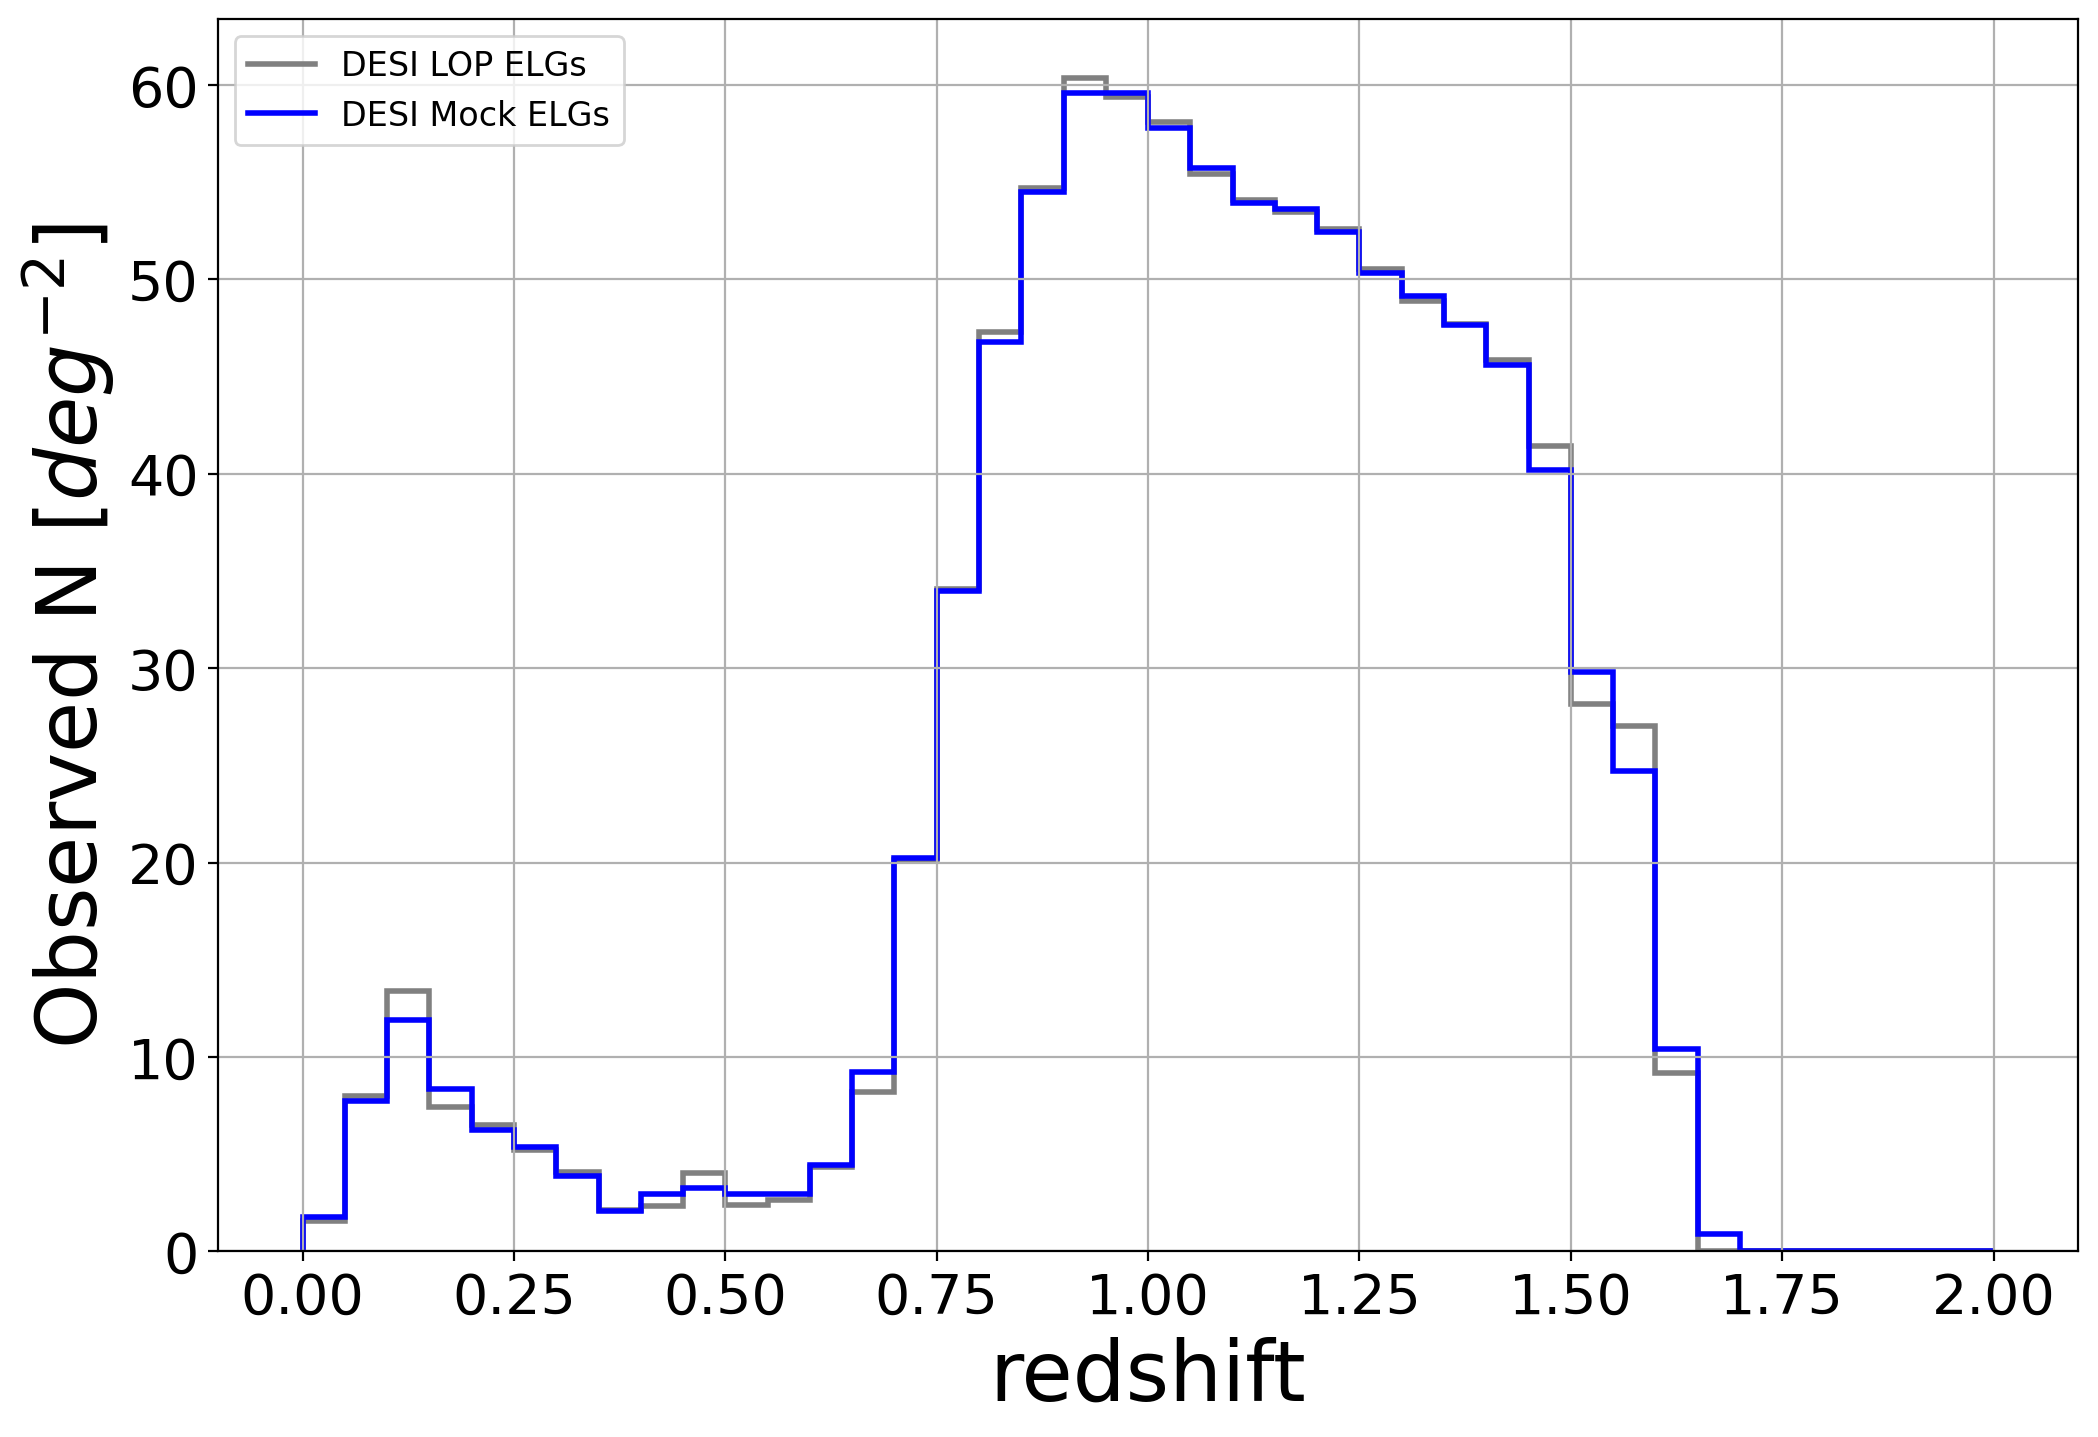

In [8]:
values_sim, edges = np.histogram(mock_elg_cat['redshift'], bins=np.linspace(0, 2, 41))


fig, ax = plt.subplots()
ax.stairs(weightedavg, edges, linewidth=2, color ='grey', label= 'DESI LOP ELGs')
ax.stairs(values_sim/(2*AREA_PER_HEALPIX), edges, linewidth=2, color='blue', label='DESI Mock ELGs')
# ax.axvline(x=1.10,ls='--', color='black')
# ax.axvline(x=1.60,ls='--', color='black')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlabel('redshift', fontsize=30)
ax.set_ylabel('Observed N [$deg^{-2}]$', fontsize=30)
ax.legend(loc='upper left', fontsize=12)